<a href="https://colab.research.google.com/github/GabrilaGladis/ML-project/blob/main/MiniProject_PLDD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install matplotlib
!pip install opencv-python-headless

import os
import zipfile

# Unzipping the uploaded file (Assuming the file is uploaded to '/mnt/data/')
zip_file_path = '/content/archive (2) (2).zip'
extract_dir = '/content/dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 15.5 MB/s eta 0:00:00
Files extracted to /content/dataset/


In [2]:
!pip install ultralytics


In [3]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained)
model = YOLO('yolov8n.pt')  # yolov8n.pt is the smallest and fastest model

# Training the model on your dataset (assuming dataset is in YOLO format)
model.train(data=f'{extract_dir}/data.yaml', epochs=25, imgsz=640)

# Save the trained model
model.save('plant_disease_yolov8.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.1MB/s]


Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset//data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 645 images, 18 backgrounds, 0 corrupt: 100%|██████████| 645/645 [00:00<00:00, 1350.23it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 61 images, 2 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<00:00, 1562.43it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.497      3.896      1.274         33        640: 100%|██████████| 41/41 [08:28<00:00, 12.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.09s/it]

                   all         61        196    0.00105      0.163     0.0742     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       1.48      2.832      1.252         14        640: 100%|██████████| 41/41 [08:30<00:00, 12.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.59s/it]

                   all         61        196     0.0181      0.205      0.146       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G       1.49        2.4      1.226         22        640: 100%|██████████| 41/41 [08:18<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.55s/it]

                   all         61        196      0.887     0.0965      0.237      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.402      2.167      1.213         15        640: 100%|██████████| 41/41 [08:24<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.58s/it]

                   all         61        196      0.507      0.289       0.27      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.365      2.036      1.184         27        640: 100%|██████████| 41/41 [08:19<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.86s/it]

                   all         61        196      0.375      0.352      0.327      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G       1.34      1.828      1.154         15        640: 100%|██████████| 41/41 [08:27<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.48s/it]

                   all         61        196      0.887      0.274      0.332      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.273      1.776      1.139         33        640: 100%|██████████| 41/41 [08:18<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.94s/it]

                   all         61        196      0.866      0.307      0.351      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.335      1.718      1.159         24        640: 100%|██████████| 41/41 [08:24<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.42s/it]

                   all         61        196      0.865       0.28      0.334      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.255      1.662      1.099         35        640: 100%|██████████| 41/41 [08:25<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.36s/it]

                   all         61        196      0.661      0.401      0.388      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.218      1.509      1.103         20        640: 100%|██████████| 41/41 [08:24<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.60s/it]

                   all         61        196      0.806      0.395      0.456      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.208      1.408      1.097         12        640: 100%|██████████| 41/41 [08:35<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.37s/it]

                   all         61        196      0.771      0.403      0.451      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.195      1.449      1.097         21        640: 100%|██████████| 41/41 [08:27<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.58s/it]

                   all         61        196      0.412      0.492      0.483      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.196      1.354      1.081         29        640: 100%|██████████| 41/41 [08:31<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.92s/it]

                   all         61        196      0.825      0.419      0.456      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.137      1.229      1.068         19        640: 100%|██████████| 41/41 [08:23<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.67s/it]

                   all         61        196      0.558      0.512      0.531       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.147       1.25      1.041         26        640: 100%|██████████| 41/41 [08:20<00:00, 12.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.73s/it]

                   all         61        196      0.737      0.514      0.558      0.363


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.228      1.386      1.058         12        640: 100%|██████████| 41/41 [08:15<00:00, 12.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.74s/it]

                   all         61        196      0.524      0.535      0.535       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      1.228      1.295      1.055         22        640: 100%|██████████| 41/41 [08:22<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.38s/it]

                   all         61        196      0.653      0.582      0.583       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.196      1.253      1.037         30        640: 100%|██████████| 41/41 [08:21<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.37s/it]

                   all         61        196      0.569      0.647      0.612        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G      1.149      1.202      1.009         17        640: 100%|██████████| 41/41 [08:24<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.61s/it]

                   all         61        196       0.58      0.684      0.599       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      1.109      1.121      1.001         28        640: 100%|██████████| 41/41 [08:24<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.23s/it]

                   all         61        196      0.654      0.654      0.632      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      1.081      1.081     0.9803         10        640: 100%|██████████| 41/41 [08:18<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.77s/it]

                   all         61        196      0.677      0.648      0.631       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.082      1.083      0.986         18        640: 100%|██████████| 41/41 [08:19<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.13s/it]

                   all         61        196      0.701      0.652      0.637      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.069      1.016       0.97         21        640: 100%|██████████| 41/41 [08:18<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.94s/it]

                   all         61        196      0.689      0.648      0.625      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.076      1.037     0.9688         14        640: 100%|██████████| 41/41 [08:16<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.82s/it]

                   all         61        196      0.703      0.647       0.64      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G      1.019      1.004     0.9653         15        640: 100%|██████████| 41/41 [08:13<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.55s/it]

                   all         61        196      0.688      0.658      0.636      0.437



25 epochs completed in 3.620 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.79s/it]


                   all         61        196      0.688      0.657      0.637      0.437
        Bacterial Spot          3          4      0.826       0.75      0.751      0.416
          Early_Blight         31         96      0.718      0.849      0.792      0.456
               Healthy         19         19      0.961          1      0.995       0.93
           Late_blight         13         29      0.747      0.828      0.915      0.727
             Leaf Mold          4          7      0.283      0.286      0.152     0.0663
           Target_Spot          5          6      0.463        0.5      0.403      0.267
            black spot         21         35      0.819      0.388      0.448      0.198
Speed: 2.7ms preprocess, 239.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train



image 1/31 /content/dataset/test/images/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg: 640x640 1 Healthy, 227.4ms
image 2/31 /content/dataset/test/images/IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg: 640x640 3 Early_Blights, 2 Leaf Molds, 2 black spots, 203.3ms
image 3/31 /content/dataset/test/images/IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg: 640x640 1 Early_Blight, 231.9ms
image 4/31 /content/dataset/test/images/IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg: 640x640 3 Early_Blights, 1 Leaf Mold, 196.9ms
image 5/31 /content/dataset/test/images/IMG_0281_JPG.rf.a29c913abceeed1ea6092ab0f2c92b0d.jpg: 640x640 3 Early_Blights, 1 Leaf Mold, 1 black spot, 200.9ms
image 6/31 /content/dataset/test/images/IMG_0288_JPG.rf.ca824ec09b29571c39dc6b6ee6b0f6a7.jpg: 640x640 2 Early_Blights, 1 black spot, 204.8ms
image 7/31 /content/dataset/test/images/IMG_0299_JPG.rf.d19f0cf7d3997c407f195ae8c59cd046.jpg: 640x640 2 Late_blights, 1 black spot, 208.8ms
image 8/31 /content/d

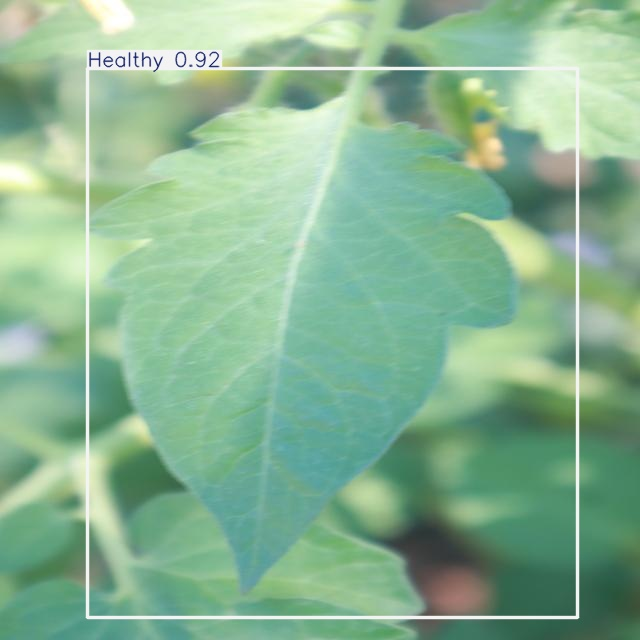

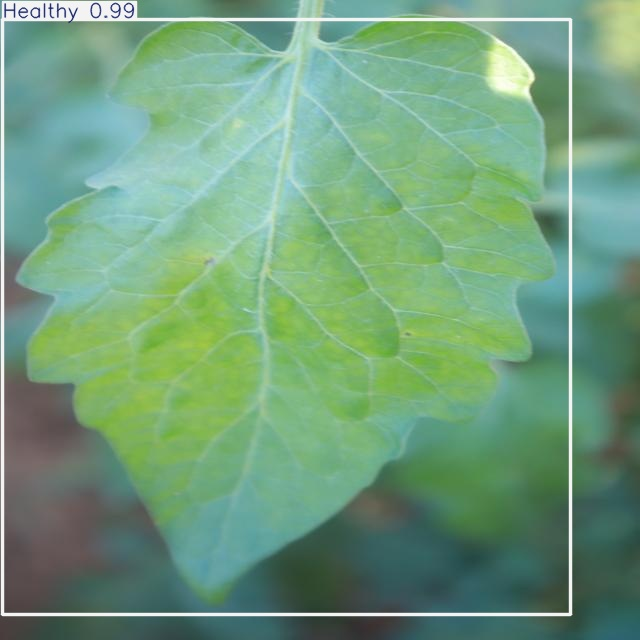

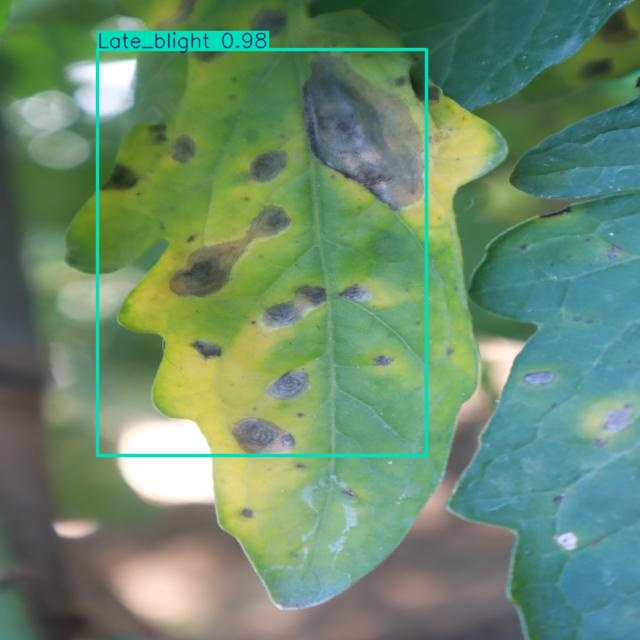

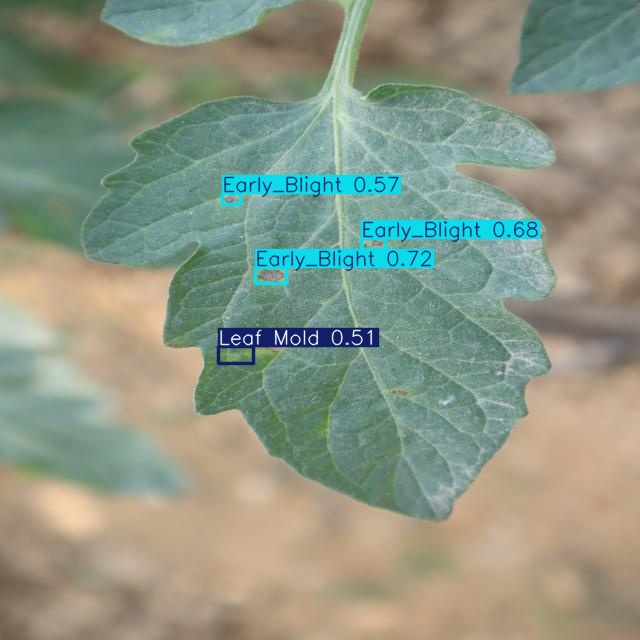

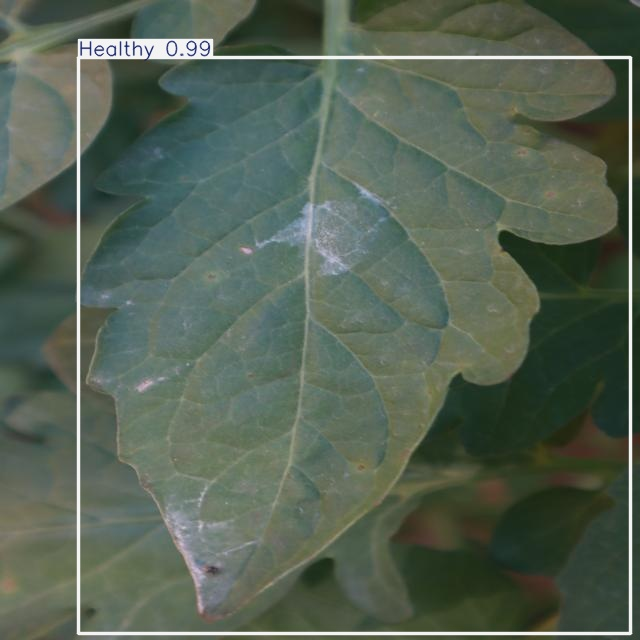

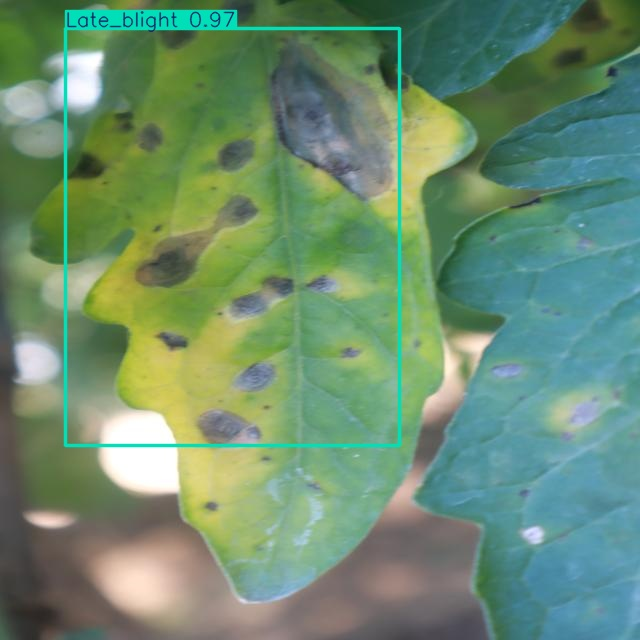

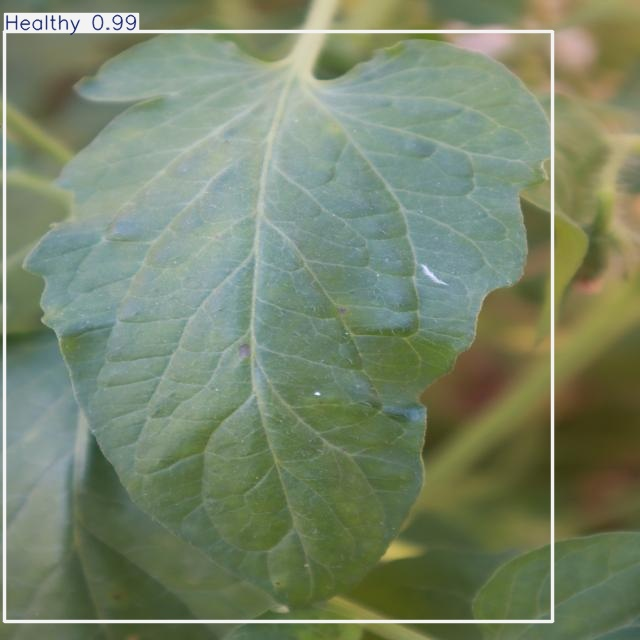

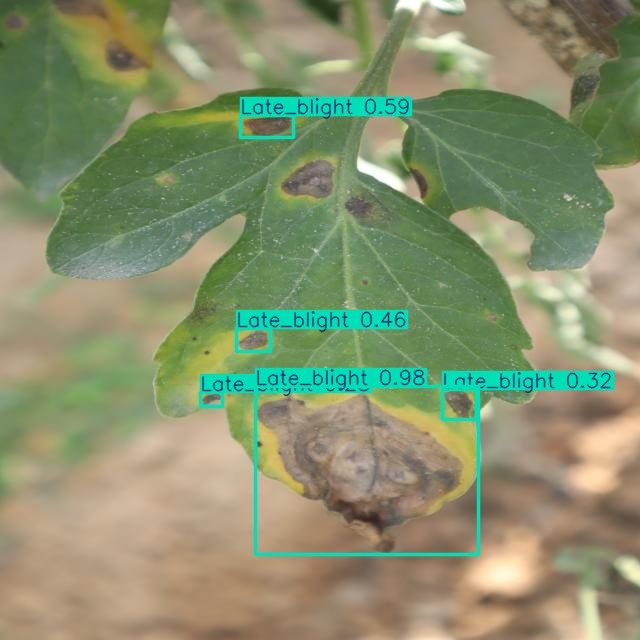

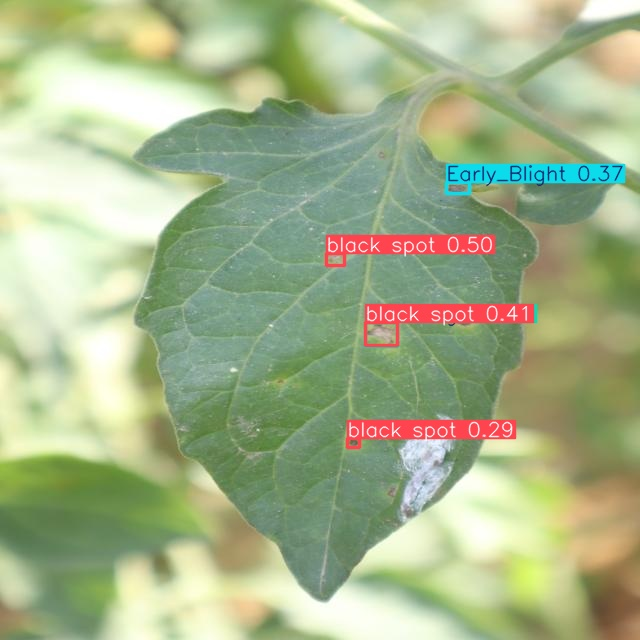

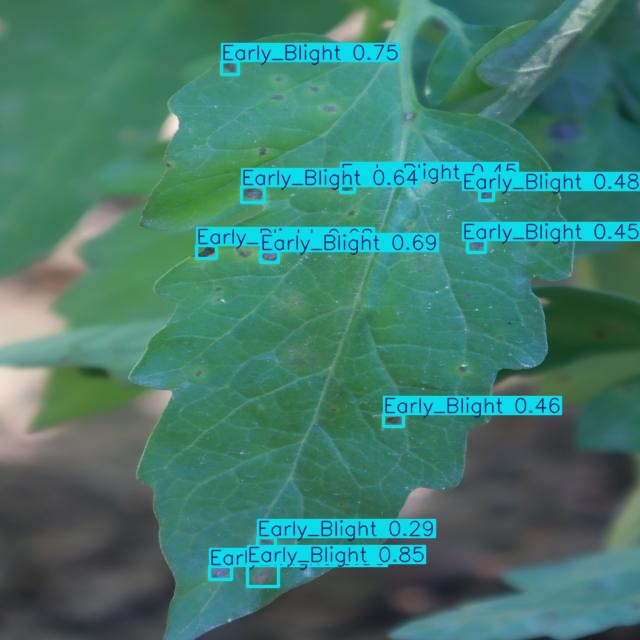

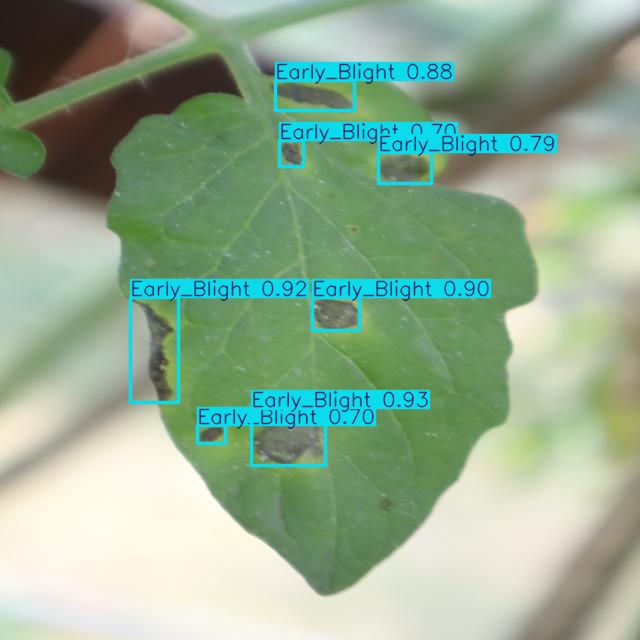

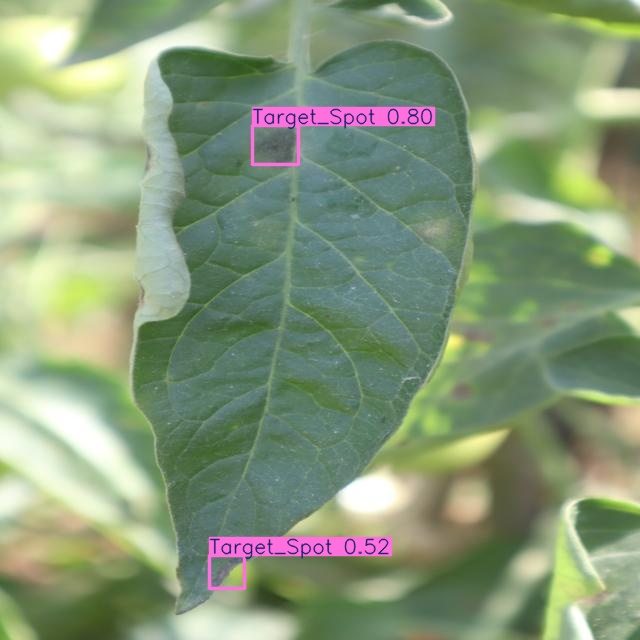

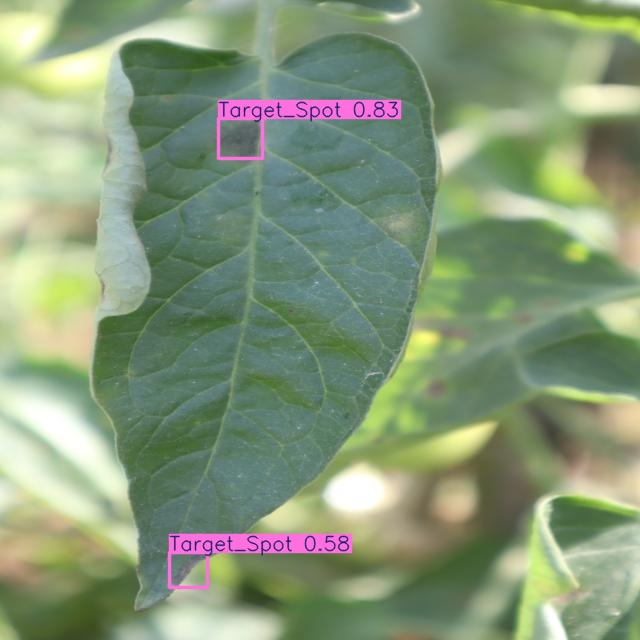

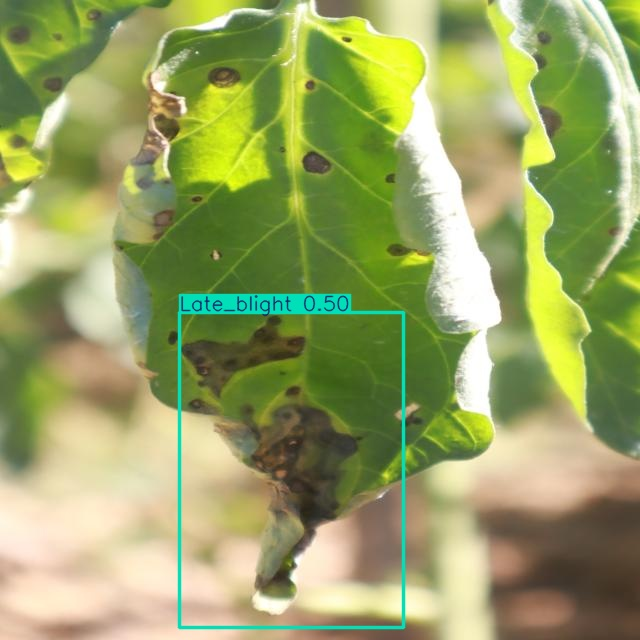

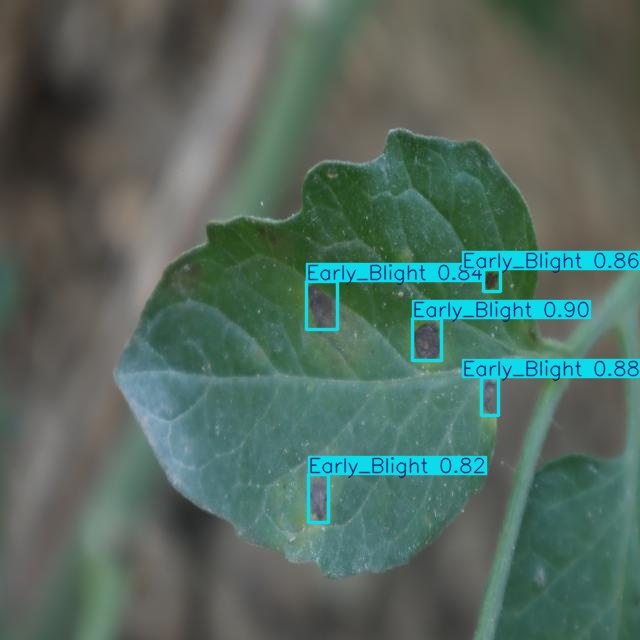

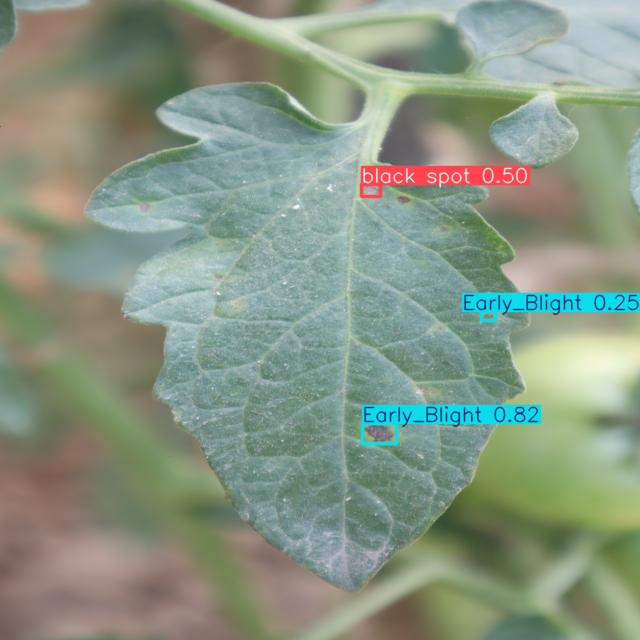

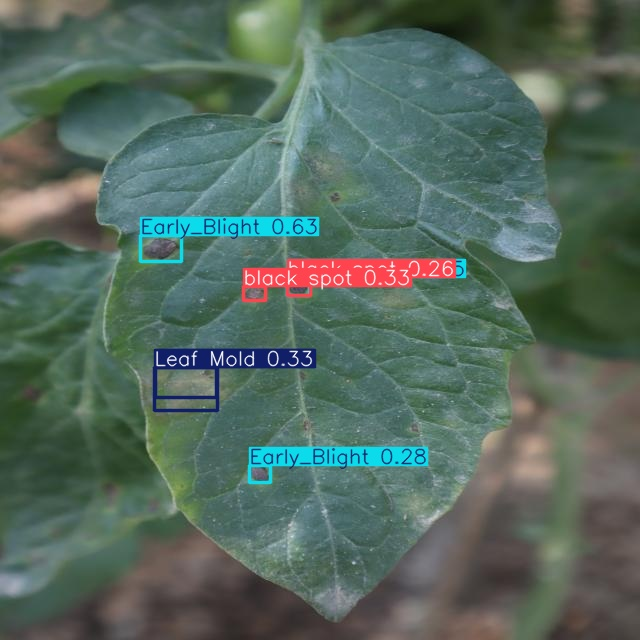

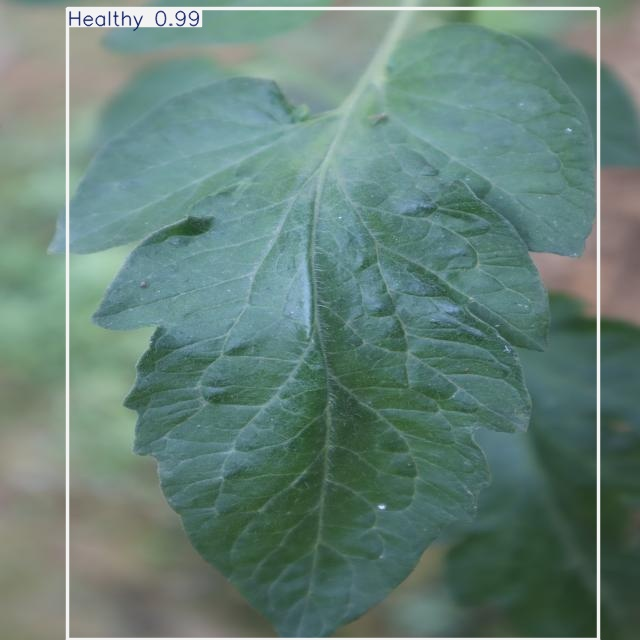

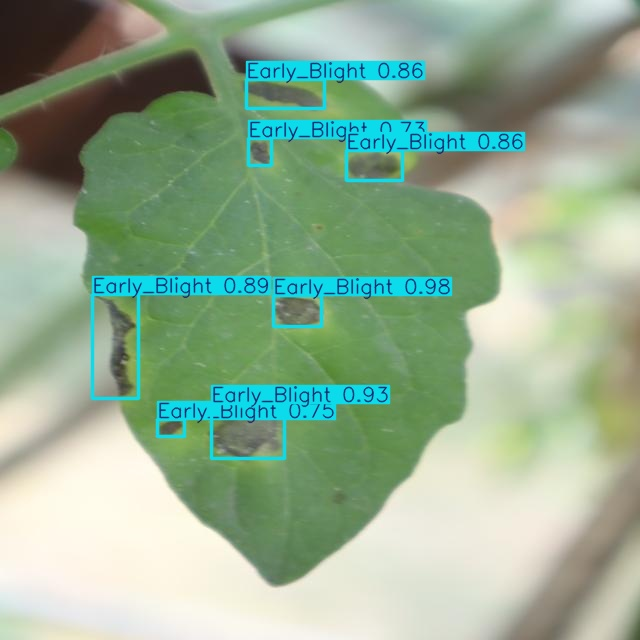

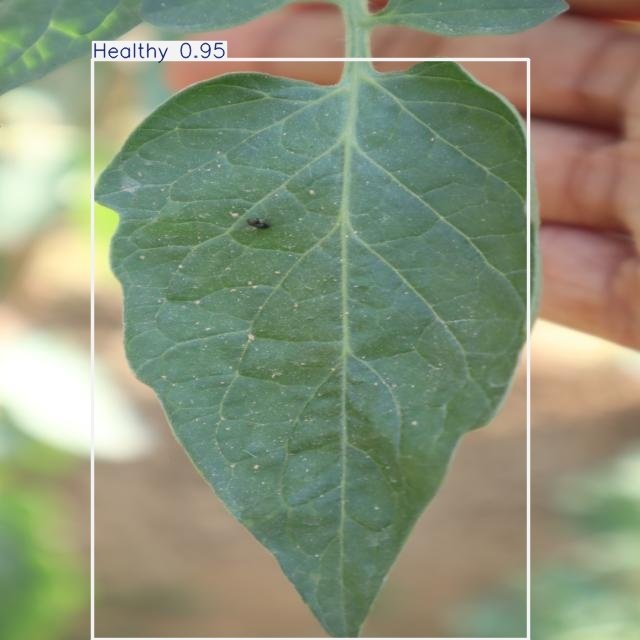

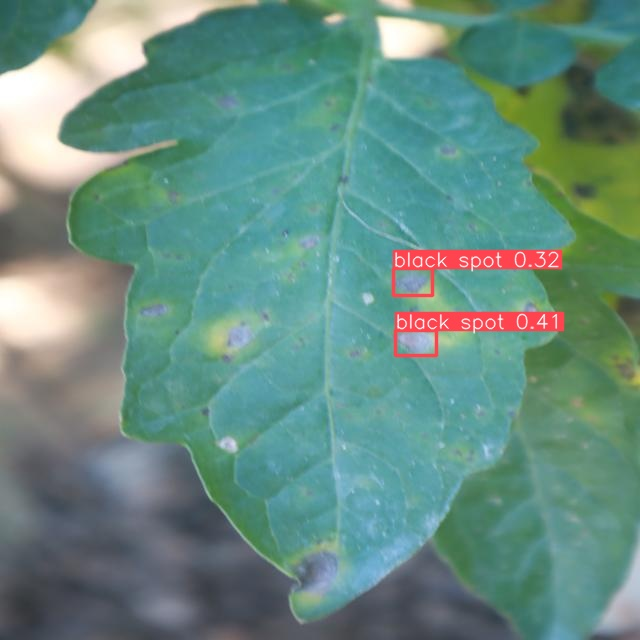

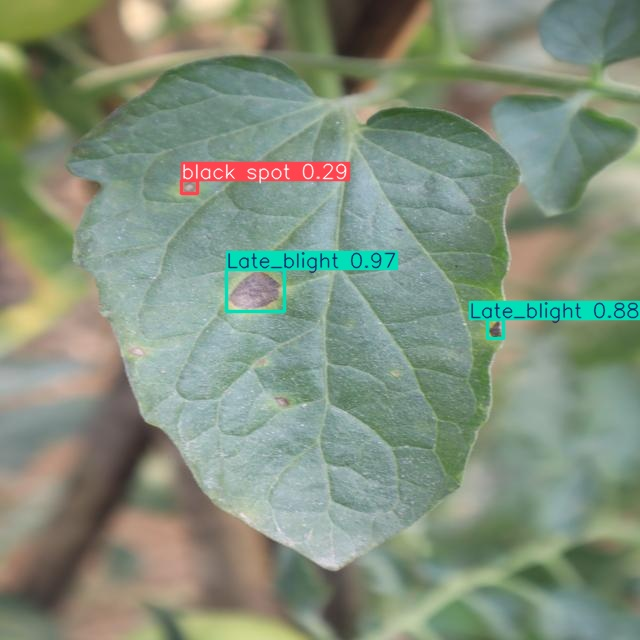

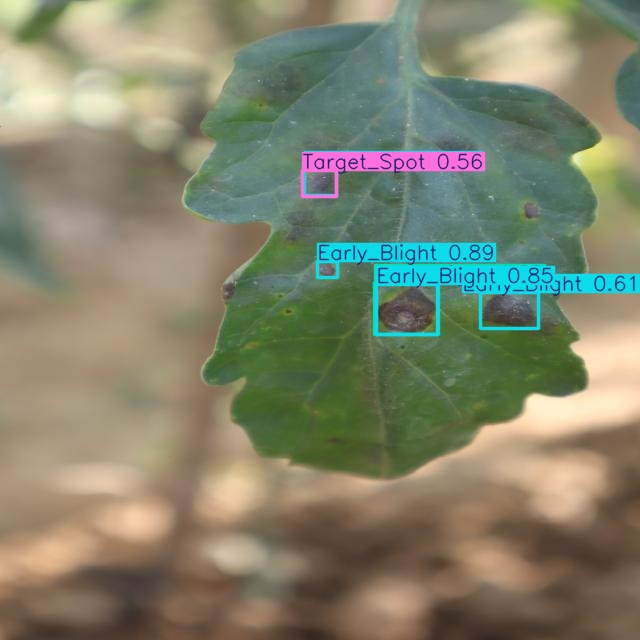

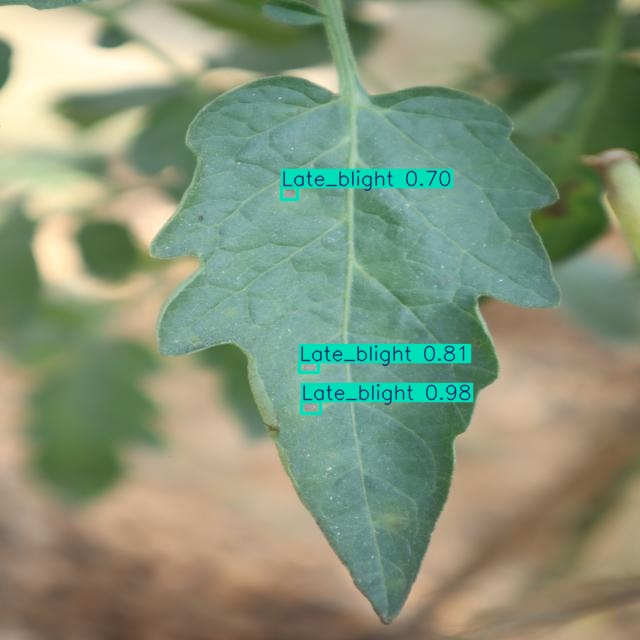

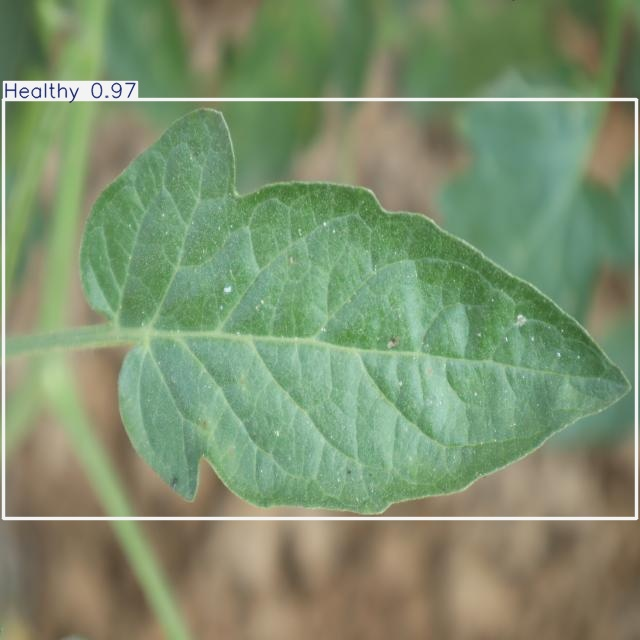

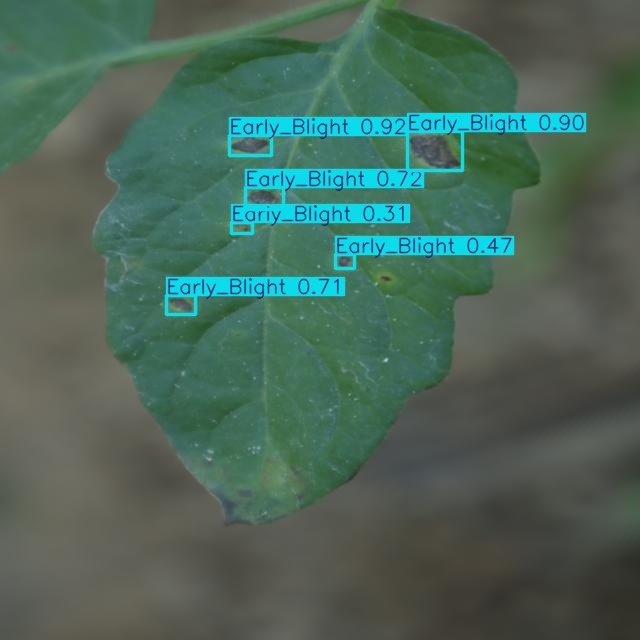

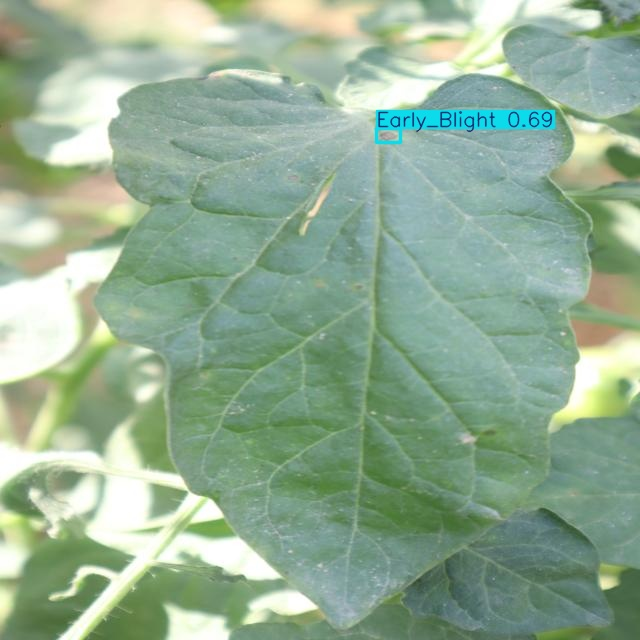

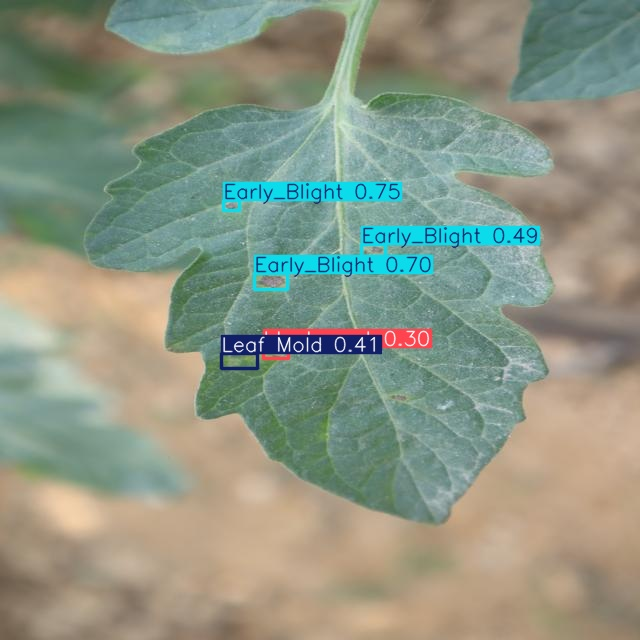

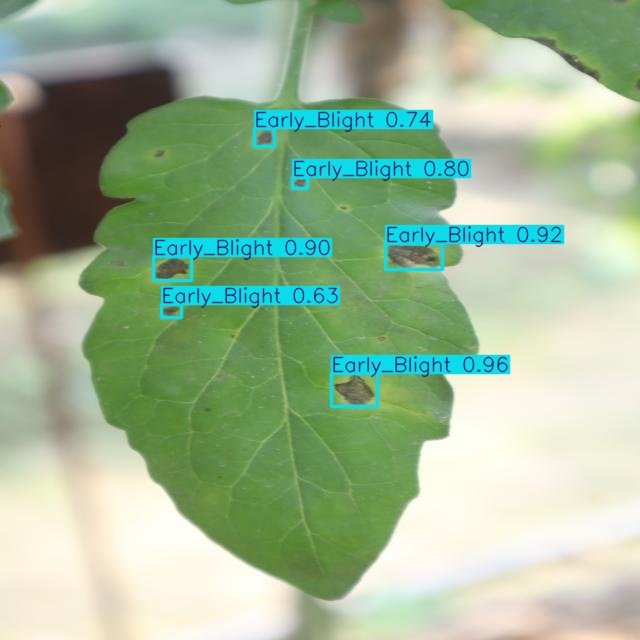

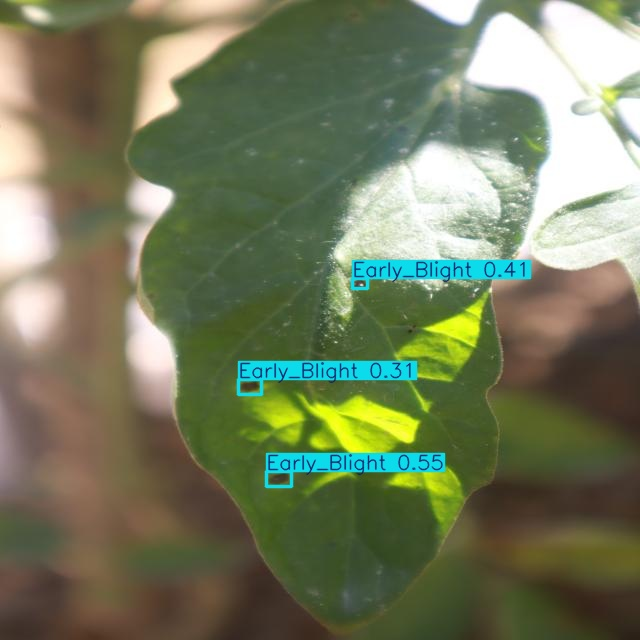

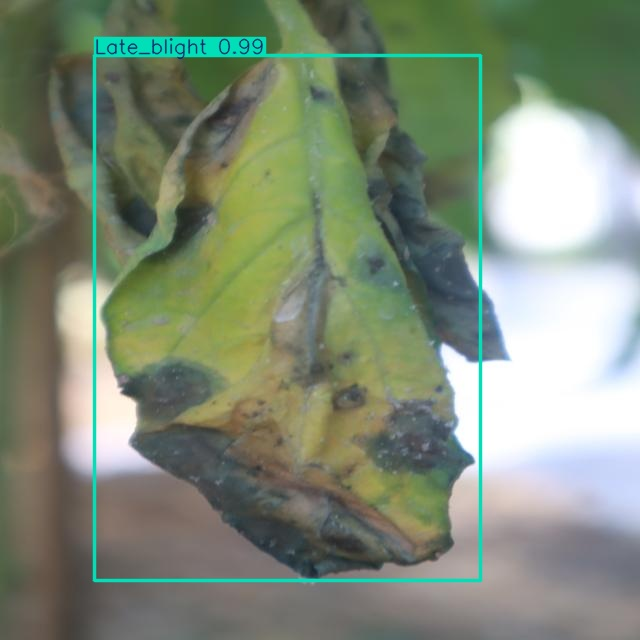

In [6]:
# Load the best model after training
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to the best model after training

# Perform predictions on the validation set or any test images
results = model.predict(source='/content/dataset/test/images', save=True, conf=0.25)  # Change source to your test images

# Visualize the results
from IPython.display import Image, display
import glob

# Display all saved images with predictions
image_paths = glob.glob('/content/runs/detect/predict/*.jpg')  # Path where YOLOv8 saves predictions

for img_path in image_paths:
    display(Image(filename=img_path))

In [7]:
from ultralytics import YOLO

# Load the best YOLOv8 model (replace with your model path)
model = YOLO('/content/runs/detect/train/weights/best.pt')

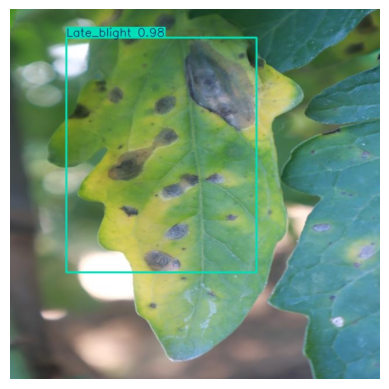

In [11]:
# Assuming the image is already in your Colab environment
image_path ='/content/runs/detect/predict/IMG_1141_JPG.rf.974b08fa79db2a3fe741383ba39e8603.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


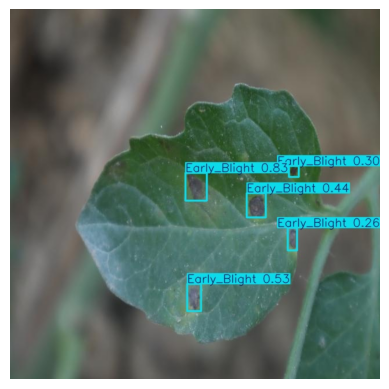

In [ ]:
# Assuming the image is already in your Colab environment
image_path ='/content/runs/detect/predict3/IMG_0371_JPG.rf.eceaf990bab5276fbb1499eb0321f412.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()
